## **Assignment**: Data Preprocessing & Logistic Regression (dataset: Product_Discount.csv)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv("./datasets/Product_Discount.csv")
print(df.head())

df.info()
df.describe()

  ProductCategory       Price  Quantity         PurchaseDate  Discount
0           Books   25.244412       6.0           23/06/2022     False
1     Electronics  109.657164       3.0           30/10/2021     False
2           Books   87.975397       7.0  2020-09-07 00:00:00     False
3           Books  196.651937       NaN  2021-08-12 00:00:00     False
4     Electronics   31.287391       9.0           24/11/2022     False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  1000 non-null   object 
 1   Price            950 non-null    float64
 2   Quantity         900 non-null    float64
 3   PurchaseDate     1000 non-null   object 
 4   Discount         1000 non-null   bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 32.4+ KB


,Price,Quantity
count,950.000000,900.000000
mean,110.964319,4.983333
std,64.812614,2.531394
min,10.880084,1.000000
25%,56.108796,3.000000
50%,111.226986,5.000000
75%,156.474693,7.000000
max,398.064973,9.000000


In [26]:
df.isnull().sum()
df.head()

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,2020-09-07 00:00:00,False
3,Books,196.651937,NaN,2021-08-12 00:00:00,False
4,Electronics,31.287391,9.0,24/11/2022,False


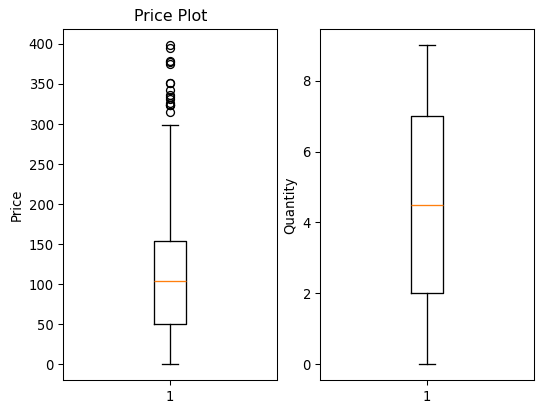

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,2020-09-07 00:00:00,False
3,Books,196.651937,0.0,2021-08-12 00:00:00,False
4,Electronics,31.287391,9.0,24/11/2022,False


In [27]:
df['Quantity'] = df['Quantity'].fillna(0)
df['Quantity'].isnull().sum()
df['Price'] = df['Price'].fillna(0)
df['Price'].isnull().sum()
fig,(g1,g2) = plt.subplots(1,2,dpi=95)

#for col in df.columns:
g1.boxplot(df['Price'])
g1.set_ylabel('Price')
g1.set_title('Price Plot')


g2.boxplot(df['Quantity'])
g2.set_ylabel('Quantity')
plt.show()
df.head()

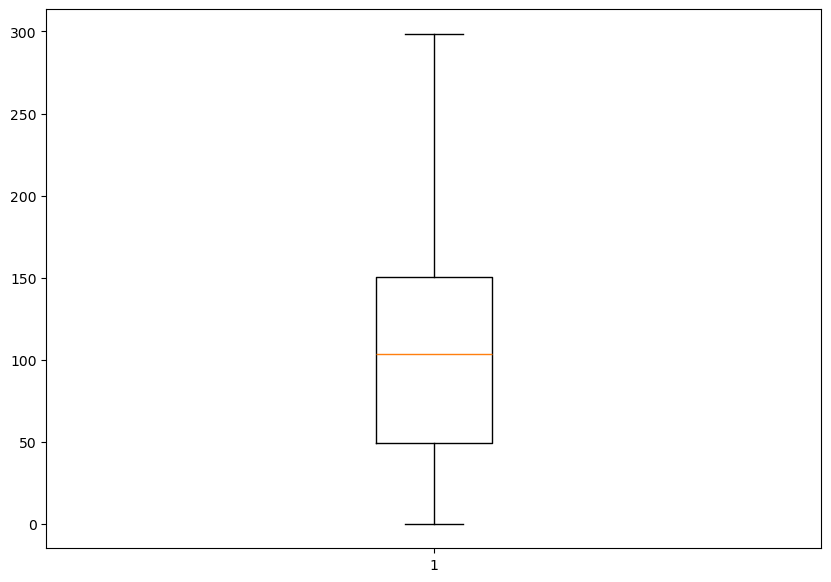

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,2020-09-07 00:00:00,False
3,Books,196.651937,0.0,2021-08-12 00:00:00,False
4,Electronics,31.287391,9.0,24/11/2022,False


In [28]:
q1, q3 = np.percentile(df['Price'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
# Drop the outliers
upper_array = np.where(df['Price'] >= upper)[0]
lower_array = np.where(df['Price'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df['Price'])
plt.show()

df.head()





In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df.head()


,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,2020-09-07 00:00:00,False
3,Books,196.651937,0.0,2021-08-12 00:00:00,False
4,Electronics,31.287391,9.0,24/11/2022,False


In [30]:
df['ProductCategory'] = df['ProductCategory'].astype('category')
# Assigning numerical values and storing it in another columns
df['ProductCategoryNew'] = df['ProductCategory'].cat.codes
col_names=[]
col_names+= [i for i in list(df['ProductCategory'].unique())]
print(col_names)

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(df[['ProductCategoryNew']]).toarray(),columns=col_names)
#enc_data.columns = enc.get_feature_names_out(['ProductCategory'])

# Merge with main
New_df = df.join(enc_data)
#finaldf=New_df.rename(columns = {'PP':'Price','ProductCategoryNew 0':'C1', '1':'C2', '3':'C3'})


New_df.drop("ProductCategory", axis=1, inplace=True)
New_df.head()
#finaldf.describe()


['Books', 'Electronics', 'Clothing']


,Price,Quantity,PurchaseDate,Discount,ProductCategoryNew,Books,Electronics,Clothing
0,25.244412,6.0,23/06/2022,False,0,1.0,0.0,0.0
1,109.657164,3.0,30/10/2021,False,2,0.0,0.0,1.0
2,87.975397,7.0,2020-09-07 00:00:00,False,0,1.0,0.0,0.0
3,196.651937,0.0,2021-08-12 00:00:00,False,0,1.0,0.0,0.0
4,31.287391,9.0,24/11/2022,False,2,0.0,0.0,1.0


In [31]:
# New_df.drop("ProductCategoryNew", axis=1, inplace=True)
New_df.head()
New_df.drop("PurchaseDate", axis=1, inplace=True)

print(New_df)
New_df=New_df.dropna()

          Price  Quantity  Discount  ProductCategoryNew  Books  Electronics  \
0     25.244412       6.0     False                   0    1.0          0.0   
1    109.657164       3.0     False                   2    0.0          0.0   
2     87.975397       7.0     False                   0    1.0          0.0   
3    196.651937       0.0     False                   0    1.0          0.0   
4     31.287391       9.0     False                   2    0.0          0.0   
..          ...       ...       ...                 ...    ...          ...   
995  186.813091       9.0     False                   1    NaN          NaN   
996   32.109616       5.0     False                   1    NaN          NaN   
997  165.315445       1.0     False                   0    NaN          NaN   
998  164.636852       5.0      True                   0    NaN          NaN   
999  176.815121       8.0     False                   2    NaN          NaN   

     Clothing  
0         0.0  
1         1.0  
2  

Dropping:
- Discount: because it provides the output
- Product Category: Based on this, 3 new classes are being generated.

In [32]:
X=New_df.drop(['Discount','ProductCategoryNew'],axis=1)
l1 = LabelEncoder() # Constructor of class LabelEncoder()
#l1.fit(df['ProductCategory'])
New_df.Discount = l1.fit_transform(New_df.Discount) # Transforming output to 0/1 etc
y=New_df['Discount'] # Output
print(y)


0      0
1      0
2      0
3      0
4      0
      ..
979    0
980    0
981    1
982    0
983    0
Name: Discount, Length: 968, dtype: int64


In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]
finaldf=pd.DataFrame(rescaledX)
print(finaldf)

            0         1    2    3    4
0    0.084547  0.666667  1.0  0.0  0.0
1    0.367259  0.333333  0.0  0.0  1.0
2    0.294643  0.777778  1.0  0.0  0.0
3    0.658617  0.000000  1.0  0.0  0.0
4    0.104786  1.000000  0.0  0.0  1.0
..        ...       ...  ...  ...  ...
963  0.226384  1.000000  0.0  1.0  0.0
964  0.200920  0.888889  0.0  1.0  0.0
965  0.262660  0.333333  1.0  0.0  0.0
966  0.089262  0.888889  1.0  0.0  0.0
967  0.629714  1.000000  0.0  0.0  1.0

[968 rows x 5 columns]


# Logistic Regression
- Uses sigmoid activation function: $\sigma(x)=\frac{1}{1+e^{-x}}$
- Accuracy = ($\frac{TP+TN}{TP+FP+TN+FN}$)

In [34]:
cls=LogisticRegression(solver='lbfgs', max_iter=400)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldf, y, test_size=0.2, random_state=42)
cls.fit(X_train,y_train)    # Training, find out the correct weight and bias
y_pred=cls.predict(X_test)  # Testing, predict y for input x
print(y_pred)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {score}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Accuracy: 0.7731958762886598
